# Forecast methodology diagram

This notebook renders a flow diagram of the forecasting pipeline defined in `src/forecast_helpers.py`.


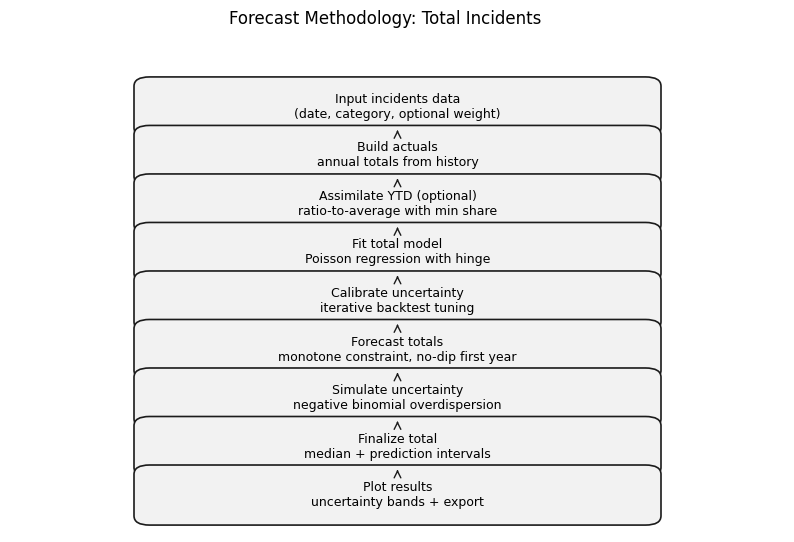

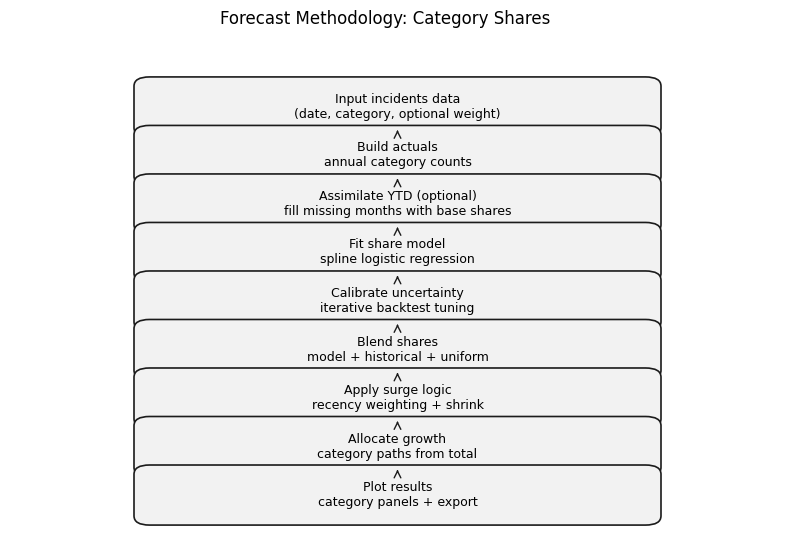

In [8]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch

EDGE = "#1b1b1b"
FILL = "#f2f2f2"


def add_box(ax, x, y, text, width=0.64, height=0.09):
    box = FancyBboxPatch(
        (x - width / 2, y - height / 2),
        width,
        height,
        boxstyle="round,pad=0.02,rounding_size=0.02",
        linewidth=1.2,
        edgecolor=EDGE,
        facecolor=FILL,
    )
    ax.add_patch(box)
    ax.text(x, y, text, ha="center", va="center", fontsize=9)


def add_arrow(ax, x1, y1, x2, y2):
    arrow = FancyArrowPatch(
        (x1, y1),
        (x2, y2),
        arrowstyle="->",
        mutation_scale=12,
        linewidth=1.0,
        color=EDGE,
    )
    ax.add_patch(arrow)


def flow_positions(n, top=0.92, bottom=0.08):
    if n == 1:
        return [top]
    step = (top - bottom) / (n - 1)
    return [top - i * step for i in range(n)]


def draw_flow(steps, title, out_path):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis("off")

    ys = flow_positions(len(steps))
    for y, text in zip(ys, steps):
        add_box(ax, 0.5, y, text)

    for y_top, y_bottom in zip(ys[:-1], ys[1:]):
        add_arrow(ax, 0.5, y_top - 0.055, 0.5, y_bottom + 0.055)

    fig.suptitle(title, fontsize=12, y=0.98)
    fig.savefig(out_path, dpi=200, bbox_inches="tight")
    return fig


steps_total = [
    "Input incidents data\n(date, category, optional weight)",
    "Build actuals\nannual totals from history",
    "Assimilate YTD (optional)\nratio-to-average with min share",
    "Fit total model\nPoisson regression with hinge",
    "Calibrate uncertainty\niterative backtest tuning",
    "Forecast totals\nmonotone constraint, no-dip first year",
    "Simulate uncertainty\nnegative binomial overdispersion",
    "Finalize total\nmedian + prediction intervals",
    "Plot results\nuncertainty bands + export",
]

steps_shares = [
    "Input incidents data\n(date, category, optional weight)",
    "Build actuals\nannual category counts",
    "Assimilate YTD (optional)\nfill missing months with base shares",
    "Fit share model\nspline logistic regression",
    "Calibrate uncertainty\niterative backtest tuning",
    "Blend shares\nmodel + historical + uniform",
    "Apply surge logic\nrecency weighting + shrink",
    "Allocate growth\ncategory paths from total",
    "Plot results\ncategory panels + export",
]

fig_total = draw_flow(
    steps_total,
    title="Forecast Methodology: Total Incidents",
    out_path="output/forecast_methodology_total.png",
)
fig_shares = draw_flow(
    steps_shares,
    title="Forecast Methodology: Category Shares",
    out_path="output/forecast_methodology_shares.png",
)

plt.show()


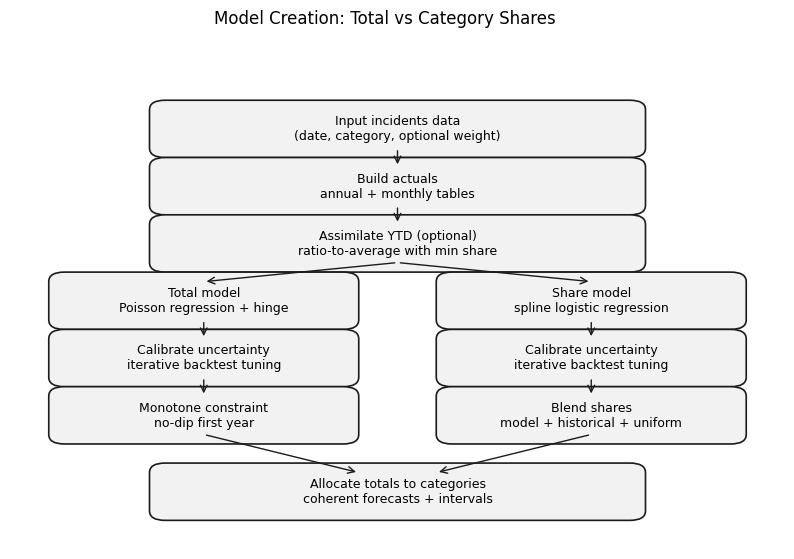

In [11]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch

EDGE = "#1b1b1b"
FILL = "#f2f2f2"


def add_box(ax, x, y, text, width=0.36, height=0.08):
    box = FancyBboxPatch(
        (x - width / 2, y - height / 2),
        width,
        height,
        boxstyle="round,pad=0.02,rounding_size=0.02",
        linewidth=1.2,
        edgecolor=EDGE,
        facecolor=FILL,
    )
    ax.add_patch(box)
    ax.text(x, y, text, ha="center", va="center", fontsize=9)


def add_arrow(ax, x1, y1, x2, y2):
    arrow = FancyArrowPatch(
        (x1, y1),
        (x2, y2),
        arrowstyle="->",
        mutation_scale=12,
        linewidth=1.0,
        color=EDGE,
    )
    ax.add_patch(arrow)


fig, ax = plt.subplots(figsize=(10, 6.2))
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis("off")

# Shared preprocessing
add_box(ax, 0.5, 0.88, "Input incidents data\n(date, category, optional weight)", width=0.6)
add_box(ax, 0.5, 0.76, "Build actuals\nannual + monthly tables", width=0.6)
add_box(ax, 0.5, 0.64, "Assimilate YTD (optional)\nratio-to-average with min share", width=0.6)
add_arrow(ax, 0.5, 0.84, 0.5, 0.80)
add_arrow(ax, 0.5, 0.72, 0.5, 0.68)

# Branch to total model
add_box(ax, 0.25, 0.52, "Total model\nPoisson regression + hinge")
add_box(ax, 0.25, 0.40, "Calibrate uncertainty\niterative backtest tuning")
add_box(ax, 0.25, 0.28, "Monotone constraint\nno-dip first year")
add_arrow(ax, 0.5, 0.60, 0.25, 0.56)
add_arrow(ax, 0.25, 0.48, 0.25, 0.44)
add_arrow(ax, 0.25, 0.36, 0.25, 0.32)

# Branch to category shares model
add_box(ax, 0.75, 0.52, "Share model\nspline logistic regression")
add_box(ax, 0.75, 0.40, "Calibrate uncertainty\niterative backtest tuning")
add_box(ax, 0.75, 0.28, "Blend shares\nmodel + historical + uniform")
add_arrow(ax, 0.5, 0.60, 0.75, 0.56)
add_arrow(ax, 0.75, 0.48, 0.75, 0.44)
add_arrow(ax, 0.75, 0.36, 0.75, 0.32)

# Merge into coherent forecast
add_box(ax, 0.5, 0.12, "Allocate totals to categories\ncoherent forecasts + intervals", width=0.6)
add_arrow(ax, 0.25, 0.24, 0.45, 0.16)
add_arrow(ax, 0.75, 0.24, 0.55, 0.16)

fig.suptitle("Model Creation: Total vs Category Shares", fontsize=12, y=0.98)
fig.savefig("output/model_creation_total_and_shares.png", dpi=200, bbox_inches="tight")
plt.show()
